In [1]:
# Importing the important libraries
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp


In [2]:
# Reading the data
data= pd.read_csv("preprocessedData.csv")
data=data.drop(['Unnamed: 0'], axis=1)
data

,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,مثل ما داعش فجر تاريخ اجدادنا قبل سنه واحنه مع...
1,869345568534941696,IQ,0,احنا سنه وحق الله منفرق بس حسبى الله ونعم الوك...
2,936739253412917248,IQ,0,الكاوليه هنود مو عرب خلك غلابه عايشين بدون مشا...
3,995964915583156224,IQ,0,عليمن انطلع حركتنه بس ريد اذكر الزواج الى صدكو بى
4,633976940433510400,IQ,0,شيلوو اشتهر حسونى مع نور الزين والردح الزين
...,...,...,...,...
17995,1153015108106444800,BH,17,اى حتى الطير صايدتنه عدل
17996,1015716046085468160,BH,17,اشتكت لزوجها احس انى متضايقه فرد عليها الحنون ...
17997,1016457209851580416,BH,17,انت القمر بوسط ليلى انت مرى وحلمى انت النور لع...
17998,1153244931269566464,BH,17,عجيبه الصراحه ويامنظر الطبيعه تنسى كلشى الله ي...


In [3]:
# Data type of each column
data.dtypes

id              int64
dialect        object
transformed     int64
fineText       object
dtype: object

In [4]:
# Missing values in the data
nullData= data.isnull().sum()
nullData

id             0
dialect        0
transformed    0
fineText       9
dtype: int64

In [3]:
# Dropping the null values in the data
data= data.dropna(axis=0)
# Ensuring that there are no missing values
data.isnull().sum() / data.shape[0] * 100

id             0.0
dialect        0.0
transformed    0.0
fineText       0.0
dtype: float64

In [4]:
# Putting each word in an array, so the sentence would be array of array of words
data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()]) 
data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))
data

/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1264/246733476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()])
/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1264/246733476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))


,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,['مثل'] ['ما'] ['داعش'] ['فجر'] ['تاريخ'] ['اج...
1,869345568534941696,IQ,0,['احنا'] ['سنه'] ['وحق'] ['الله'] ['منفرق'] ['...
2,936739253412917248,IQ,0,['الكاوليه'] ['هنود'] ['مو'] ['عرب'] ['خلك'] [...
3,995964915583156224,IQ,0,['عليمن'] ['انطلع'] ['حركتنه'] ['بس'] ['ريد'] ...
4,633976940433510400,IQ,0,['شيلوو'] ['اشتهر'] ['حسونى'] ['مع'] ['نور'] [...
...,...,...,...,...
17995,1153015108106444800,BH,17,['اى'] ['حتى'] ['الطير'] ['صايدتنه'] ['عدل']
17996,1015716046085468160,BH,17,['اشتكت'] ['لزوجها'] ['احس'] ['انى'] ['متضايقه...
17997,1016457209851580416,BH,17,['انت'] ['القمر'] ['بوسط'] ['ليلى'] ['انت'] ['...
17998,1153244931269566464,BH,17,['عجيبه'] ['الصراحه'] ['ويامنظر'] ['الطبيعه'] ...


In [5]:
# Performing embedding using and storing the embedding in the dataset
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(data['fineText'])

LSTM model:

In [6]:
# Importing Libraries:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [7]:
# Splitting of data to train and test
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['transformed'], test_size=0.2, random_state=1)

# Converting the splitted data to arrays
X_train= X_train.toarray()
X_test=X_test.toarray()

# Converting the X_train and X_test to type float as they are written 0. not 0.0 
# Reshaping them back to their original shape as they were flattened 
X_train=np.asarray(X_train).astype('float32').reshape(X_train.shape[0],1,X_train.shape[1])
X_test=np.asarray(X_test).astype('float32').reshape(X_test.shape[0],1,X_test.shape[1])

# Encoding the y_train and y_test:
y_train= np.array(y_train)
y_train_hot=np.zeros((y_train.size,y_train.max()+1))
y_train_hot[np.arange(y_train.size),y_train]=1

y_test= np.array(y_test)
y_test_hot=np.zeros((y_test.size,y_test.max()+1))
y_test_hot[np.arange(y_test.size),y_test]=1

In [8]:
X_train.shape

(14392, 1, 58543)

In [10]:
# Defining the LSTM model:
model = Sequential()
model.add(LSTM(units=512))
#model.add(Dropout(0.8))
model.add(Dense(units=18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_hot, epochs=10,batch_size=64, verbose=1,validation_data=(X_test,y_test_hot))

Epoch 1/15
15/15 [==============================] - 24s 2s/step - loss: 2.8881 - accuracy: 0.1148 - val_loss: 2.8845 - val_accuracy: 0.2367
Epoch 2/15
15/15 [==============================] - 21s 1s/step - loss: 2.8696 - accuracy: 0.4981 - val_loss: 2.8756 - val_accuracy: 0.2959
Epoch 3/15
15/15 [==============================] - 23s 2s/step - loss: 2.8413 - accuracy: 0.6688 - val_loss: 2.8610 - val_accuracy: 0.3126
Epoch 4/15
15/15 [==============================] - 23s 2s/step - loss: 2.7955 - accuracy: 0.7706 - val_loss: 2.8386 - val_accuracy: 0.3304
Epoch 5/15
15/15 [==============================] - 22s 1s/step - loss: 2.7262 - accuracy: 0.8275 - val_loss: 2.8060 - val_accuracy: 0.3484
Epoch 6/15
15/15 [==============================] - 24s 2s/step - loss: 2.6274 - accuracy: 0.8495 - val_loss: 2.7616 - val_accuracy: 0.3562
Epoch 7/15
15/15 [==============================] - 23s 2s/step - loss: 2.4945 - accuracy: 0.8743 - val_loss: 2.7047 - val_accuracy: 0.3618
Epoch 8/15
15/15 [==

In [15]:
# Evaluate the model on the test data
loss, accuracy= model.evaluate(X_test, y_test_hot)
print('Test loss:', loss*100,'%')
print('Test accuracy:', accuracy*100,'%')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_hot, axis=1)
f1 = f1_score(y_true, y_pred,average='weighted')
print("F1 score:", f1)

113/113 [==============================] - 5s 45ms/step - loss: 2.1774 - accuracy: 0.3684
Test loss: 217.741060256958 %
Test accuracy: 36.843568086624146 %
113/113 [==============================] - 5s 46ms/step
F1 score: 0.368832505513386


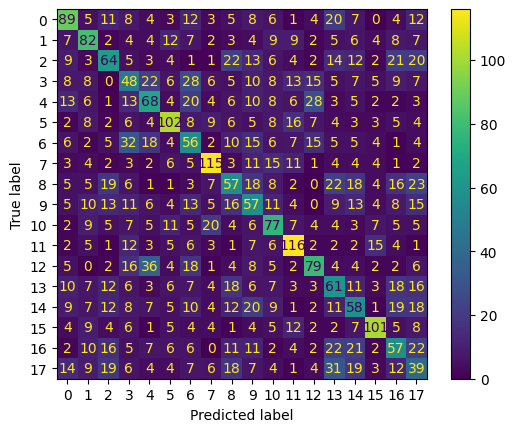

<Figure size 640x480 with 0 Axes>

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(18))
cm_display.plot()
plt.show()
plt.savefig('ConfusionMatrixLSTM.png')

In [13]:
from sklearn.metrics import classification_report

target_names = ["class_{}".format(i) for i in range(18)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.46      0.44      0.45       202
     class_1       0.43      0.46      0.45       177
     class_2       0.34      0.31      0.32       206
     class_3       0.24      0.23      0.23       210
     class_4       0.34      0.34      0.34       202
     class_5       0.53      0.50      0.52       202
     class_6       0.26      0.28      0.27       197
     class_7       0.59      0.59      0.59       196
     class_8       0.28      0.27      0.27       215
     class_9       0.26      0.28      0.27       204
    class_10       0.39      0.41      0.40       186
    class_11       0.53      0.60      0.56       193
    class_12       0.46      0.40      0.43       198
    class_13       0.27      0.30      0.28       201
    class_14       0.28      0.27      0.28       213
    class_15       0.61      0.55      0.58       184
    class_16       0.29      0.28      0.28       206
    class_17       0.18    

In [17]:
model.save('lstm.h5')

/Users/lojinkhattab/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
